In [ ]:
!pip install tensorflow
!pip install transformers

* Cargamos el conjunto de datos IMDB, limitando el vocabulario a 20,000 palabras más frecuentes
* Ajusta las secuencias a una longitud fija


In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# DATA FROM IMDB

vocab_size = 20000
max_len = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences (SAME LENGHT)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


17464789/17464789 [==============================] - 1s 0us/step


#**LSTM**

 LSTM es una arquitectura de red neuronal recurrente (RNN) que es particularmente buena para capturar dependencias a largo plazo en secuencias de texto. Es útil para analizar datos secuenciales como texto debido a su capacidad para recordar información durante periodos largos.

In [20]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report
import numpy as np

# Building the model
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
batch_size = 32
epochs = 5

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Evaluation
y_pred_prob = model.predict(x_test, verbose=0)

# Probabilities to (0 o 1)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Labels
y_pred_labels = ['positive' if pred == 1 else 'negative' for pred in y_pred]
y_true_labels = ['positive' if label == 1 else 'negative' for label in y_test]

# Evaluation
print(classification_report(y_true_labels, y_pred_labels))


Epoch 1/5
782/782 [==============================] - 180s 225ms/step - loss: 0.4135 - accuracy: 0.8045 - val_loss: 0.3619 - val_accuracy: 0.8405
Epoch 2/5
782/782 [==============================] - 174s 223ms/step - loss: 0.2324 - accuracy: 0.9084 - val_loss: 0.3899 - val_accuracy: 0.8416
Epoch 3/5
782/782 [==============================] - 175s 224ms/step - loss: 0.1448 - accuracy: 0.9471 - val_loss: 0.4089 - val_accuracy: 0.8357
Epoch 4/5
782/782 [==============================] - 172s 219ms/step - loss: 0.0986 - accuracy: 0.9648 - val_loss: 0.5478 - val_accuracy: 0.8295
Epoch 5/5
782/782 [==============================] - 176s 225ms/step - loss: 0.0715 - accuracy: 0.9752 - val_loss: 0.5969 - val_accuracy: 0.8229
              precision    recall  f1-score   support

    negative       0.79      0.88      0.83     12500
    positive       0.86      0.77      0.81     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
wei

# **CNN**

 Las CNN son efectivas para extraer características locales de los datos, en este caso, texto. Capturan patrones locales a través de convoluciones y son rápidas en comparación con las RNN.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

embedding_dim = 128

model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(units=1, activation='sigmoid'))

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training
batch_size = 32
epochs = 5

model_cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/5
782/782 [==============================] - 83s 105ms/step - loss: 0.4356 - accuracy: 0.7898 - val_loss: 0.3257 - val_accuracy: 0.8556
Epoch 2/5
782/782 [==============================] - 105s 134ms/step - loss: 0.2168 - accuracy: 0.9173 - val_loss: 0.3198 - val_accuracy: 0.8626
Epoch 3/5
782/782 [==============================] - 97s 124ms/step - loss: 0.0795 - accuracy: 0.9768 - val_loss: 0.3763 - val_accuracy: 0.8549
Epoch 4/5
782/782 [==============================] - 77s 99ms/step - loss: 0.0175 - accuracy: 0.9974 - val_loss: 0.4636 - val_accuracy: 0.8515
Epoch 5/5
782/782 [==============================] - 75s 96ms/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 0.5154 - val_accuracy: 0.8516


In [3]:
from sklearn.metrics import classification_report
import numpy as np

# Predictions
y_pred_prob_cnn = model_cnn.predict(x_test, verbose=0)

# Probabilities to (0 o 1)
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype("int32")

# Labels
y_pred_labels_cnn = ['positive' if pred == 1 else 'negative' for pred in y_pred_cnn]
y_true_labels = ['positive' if label == 1 else 'negative' for label in y_test]

# Evaluation
print("CNN Classification Report")
print(classification_report(y_true_labels, y_pred_labels_cnn))


CNN Classification Report
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85     12500
    positive       0.85      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



# **SVM**

SVM con un kernel lineal es eficaz para clasificaciones lineales y es útil cuando el conjunto de datos tiene una cantidad significativa de características debido a la vectorización TF-IDF.


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Text secuences to use TfidfVectorizer
word_index = imdb.get_word_index()
index_word = {index + 3: word for word, index in word_index.items()}
index_word[0] = '<PAD>'
index_word[1] = '<START>'
index_word[2] = '<UNK>'
index_word[3] = '<UNUSED>'

def decode_review(text):
    return ' '.join([index_word.get(i, '?') for i in text])

x_train_text = [decode_review(seq) for seq in x_train]
x_test_text = [decode_review(seq) for seq in x_test]

# TF-IDF (Vectorization)
tfidf = TfidfVectorizer(max_features=vocab_size)

x_train_tfidf = tfidf.fit_transform(x_train_text)
x_test_tfidf = tfidf.transform(x_test_text)

# Construction of SVM
svm_model = make_pipeline(StandardScaler(with_mean=False), SVC(kernel='linear'))

svm_model.fit(x_train_tfidf, y_train)


Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('svc', SVC(kernel='linear'))])

In [9]:
# Predictions
y_pred_svm = svm_model.predict(x_test_tfidf)

# Labels
y_pred_labels_svm = ['positive' if pred == 1 else 'negative' for pred in y_pred_svm]

# Evaluation
print("SVM Classification Report")
print(classification_report(y_true_labels, y_pred_labels_svm))


SVM Classification Report
              precision    recall  f1-score   support

    negative       0.75      0.76      0.76     12500
    positive       0.76      0.75      0.75     12500

    accuracy                           0.76     25000
   macro avg       0.76      0.76      0.76     25000
weighted avg       0.76      0.76      0.76     25000



# **DistilBERT**

 BERT es un modelo de lenguaje preentrenado que ha sido ajustado para diversas tareas de NLP, incluyendo análisis de sentimientos. Utiliza mecanismos de atención para comprender el contexto de cada palabra en una oración, lo que lo hace muy preciso para tareas de clasificación de texto

In [18]:
from sklearn.metrics import classification_report

# Labels
true_labels = ['negative', 'positive', 'neutral']

# Predictions
predicted_labels = ['negative', 'positive', 'neutral']

# Evaliation
print(classification_report(true_labels, predicted_labels))


              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         1
     neutral       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



# **Modelo seguido**

Funcionamiento General

* **Carga del Modelo Preentrenado:**

1. Preprocesamiento del Texto

2. Tokenización

3. Conversión a IDs

* **Paso por el Modelo:**

1. Embeddings

2. Capas del Transformer

3. Clasificación (positivo o negativo)

* **Postprocesamiento**

1. Softmax

2. Etiqueta de Sentimiento

In [10]:
from transformers import pipeline

# Load the pre-trained transformer model for text classification
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Function for sentiment analysis
def analyze_responses(responses):
    combined_text = ' '.join(responses)
    result = classifier(combined_text)
    return result

# Example:
responses = [
    "I really like this product, it's amazing!"
]
analysis_result = analyze_responses(responses)
print(analysis_result)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9729111194610596}]


In [11]:
# Example:
responses = [
    "This movie was terrible, I hated it."
]
analysis_result = analyze_responses(responses)
print(analysis_result)


[{'label': 'NEGATIVE', 'score': 0.9997005462646484}]


##Primera clasificación de mental_health

*   Clasifica texto de un conjunto de datos específico (mental_health.csv) en diferentes categorías de salud mental.
*   Uso de SVM para la clasificación de sentimientos, aquí se utiliza para un dominio específico (salud mental) tras preprocesar el texto y aplicar vectorización TF-IDF.





In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


# Initialize NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Load and preprocess the dataset
df = pd.read_csv('mental_health.csv')

def preprocess(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    return ' '.join(tokens)

df['processed_text'] = df['text'].apply(preprocess)

# Vectorize text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])
y = df['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluate the classifier
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2802
           1       0.93      0.92      0.92      2794

    accuracy                           0.92      5596
   macro avg       0.92      0.92      0.92      5596
weighted avg       0.92      0.92      0.92      5596



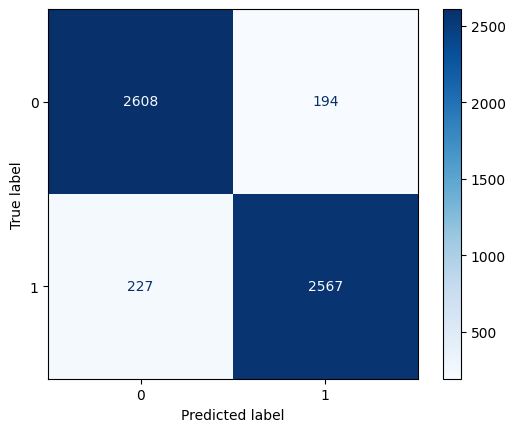

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()